 This notebooke deats with the data analysis of the raw data.

---



## Import Darts and other required libraries

In [1]:
!pip install distributed==2022.01.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 822 kB 13.2 MB/s 
     |████████████████████████████████| 1.0 MB 24.9 MB/s 
     |████████████████████████████████| 596 kB 24.4 MB/s 
     |████████████████████████████████| 141 kB 23.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Successfully uninstalled cloudpickle-1.3.0
  Attempting uninstall: dask
    Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0
  Attempting uninstall: distributed
    Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Successfully uninstalled distributed-1.25.3
ERROR: pip's dependency re

In [2]:
!pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 424 kB 26.2 MB/s 
     |████████████████████████████████| 43 kB 2.4 MB/s 
     |████████████████████████████████| 11.2 MB 43.8 MB/s 
     |████████████████████████████████| 44 kB 2.8 MB/s 
     |████████████████████████████████| 701 kB 24.2 MB/s 
     |████████████████████████████████| 9.8 MB 36.9 MB/s 
     |████████████████████████████████| 1.4 MB 49.9 MB/s 
     |████████████████████████████████| 76.6 MB 76 kB/s 
     |████████████████████████████████| 947 kB 37.2 MB/s 
     |████████████████████████████████| 5.9 MB 46.9 MB/s 
     |████████████████████████████████| 419 kB 55.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    U

In [3]:
!pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 19.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [4]:
!pip install matplotlib==3.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 13.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nfoursid 1.0.1 requires matplotlib>=3.3, but you have matplotlib 3.1.1 which is incompatible.
darts 0.21.0 requires matplotlib>=3.3.0, but you have matplotlib 3.1.1 which is incompatible.


# Import modules and libray from Datrs on other

In [5]:

import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Tuple ,Union
from pathlib import Path
import time
import os
import sys


from darts import TimeSeries
# from darts.models import (
#     RandomForest,
#     LightGBMModel,
#     TFTModel
# )
#from darts.metrics import mape, mse, ope, smape, marre, dtw_metric, mae,mase ,rmse
from darts.utils.statistics import check_seasonality, plot_acf, extract_trend_and_seasonality
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries

# for reproducibility
#torch.manual_seed(1)
#np.random.seed(1)

import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

In [ ]:
%matplotlib inline

## Project root directory

In [6]:
project_dir = Path(r"/content/drive/MyDrive/masterarbeit/pradt")
project_dir

PosixPath('/content/drive/MyDrive/masterarbeit/pradt')

## Generic repo data

In [7]:
# read the repositories generic data csv file
generic_repos_data_path = Path(project_dir/ "dataset/generic/generic_repos_data.csv")
generic_repos_data_path 

PosixPath('/content/drive/MyDrive/masterarbeit/pradt/dataset/generic/generic_repos_data.csv')

In [8]:
days_cols = ["created_at", "pushed_at", "extracted_at"]
df_gen_data = pd.read_csv(generic_repos_data_path, 
                          parse_dates=days_cols, 
                          infer_datetime_format=True
                        )

In [9]:
df_gen_data.describe()

,stars,size,branch_count,milestone_count,pullrequest_count,release_count,workflow_count,issues_count,watchers_count,subscribers_count,has_downloads,age_in_weeks,without_updates
count,598.000000,5.980000e+02,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,595.000000,598.000000,598.000000
mean,25958.730769,1.861137e+05,83.060201,34.734114,3518.712375,87.670569,31.483278,7583.852843,25916.120401,784.193980,0.971429,370.439799,3.780936
std,22501.393112,4.363717e+05,481.324223,345.047407,7903.453610,178.504161,615.358605,13553.480981,22541.879535,840.138688,0.166739,146.030717,17.010505
min,4220.000000,1.580000e+02,0.000000,0.000000,2.000000,0.000000,0.000000,23.000000,41.000000,0.000000,0.000000,18.000000,0.000000
25%,13560.500000,1.341175e+04,5.000000,0.000000,346.250000,10.000000,0.000000,1358.250000,13560.500000,324.000000,1.000000,267.250000,0.000000
50%,19903.500000,4.732400e+04,12.000000,4.500000,1039.000000,37.000000,2.000000,3383.500000,19903.500000,545.500000,1.000000,364.500000,0.000000
75%,30887.000000,1.635138e+05,35.000000,23.000000,3023.750000,91.000000,5.000000,7964.000000,30887.000000,948.500000,1.000000,482.500000,1.000000
max,196877.000000,4.670583e+06,8446.000000,8391.000000,88688.000000,2143.000000,15027.000000,148353.000000,196877.000000,7915.000000,1.000000,729.000000,242.000000


In [10]:
df_gen_data.head()

,repo_name,discription,language,user_Name,created_at,pushed_at,extracted_at,stars,size,repo_url,...,issues_count,watchers_count,subscribers_count,has_wiki,has_pages,has_projects,has_downloads,age_in_weeks,without_updates,maintenance_state
0,VincentGarreau/particles.js,A lightweight JavaScript library for creating ...,JavaScript,VincentGarreau,2014-09-06 14:29:47,2022-06-07 18:05:42,2022-06-08 01:51:46,25889,158,https://api.github.com/repos/VincentGarreau/pa...,...,484,25889,564,True,False,True,1.0,404,0,Active
1,anuraghazra/github-readme-stats,:zap: Dynamically generated stats for your git...,JavaScript,anuraghazra,2020-07-09 10:34:22,2022-04-06 00:25:31,2022-04-08 18:21:35,39687,944,https://api.github.com/repos/anuraghazra/githu...,...,1593,39687,214,False,False,False,1.0,91,0,Active
2,zenorocha/clipboard.js,:scissors: Modern copy to clipboard. No Flash....,JavaScript,zenorocha,2015-09-18 23:04:55,2022-04-01 23:19:37,2022-04-09 07:17:51,32002,4470,https://api.github.com/repos/zenorocha/clipboa...,...,793,32002,427,True,True,True,1.0,342,1,Active
3,vuejs/vuex,🗃️ Centralized State Management for Vue.js.,JavaScript,vuejs,2015-07-16 04:21:26,2022-04-11 03:39:51,2022-04-10 18:25:45,27470,17196,https://api.github.com/repos/vuejs/vuex,...,2148,27470,792,False,True,True,1.0,351,1,Active
4,odoo/odoo,Odoo. Open Source Apps To Grow Your Business.,JavaScript,odoo,2014-05-13 15:38:58,2022-06-08 09:18:55,2022-06-08 09:14:29,25220,4515002,https://api.github.com/repos/odoo/odoo,...,91313,25220,1491,True,False,False,1.0,421,1,Active


## Repositories Age range and mean

In [ ]:
repos_age = df_gen_data["age_in_weeks"]
min_age = repos_age.min()
max_age = repos_age.max()
mean_age = repos_age.mean()

print(f"The repositoires age ranges from {min_age} to {max_age} weeks with mean {mean_age}.")

## Repositories Age Distribution Visualization.

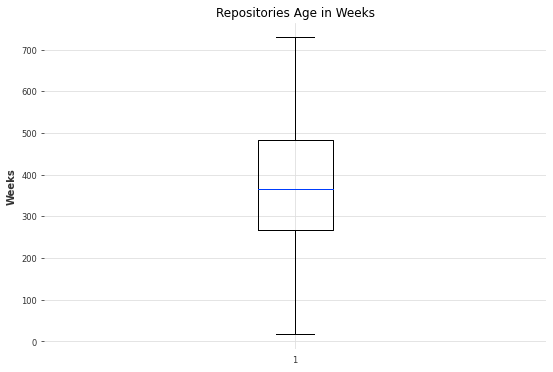

In [11]:
# Boxplot of repositories age

plt.figure(figsize=(9,6), )
age_boxplot = plt.boxplot(df_gen_data["age_in_weeks"] )
plt.ylabel("Weeks")
plt.title("Repositories Age in Weeks")
plt.show()

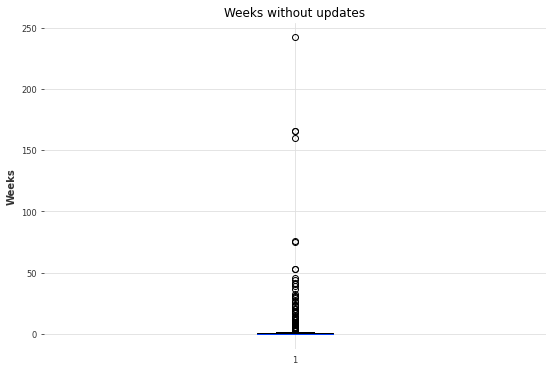

In [12]:
# Boxplot of repositoires without update period
plt.figure(figsize=(9,6), )
age_boxplot = plt.boxplot(df_gen_data["without_updates"] )
plt.ylabel("Weeks")
plt.title("Weeks without updates")
plt.show()

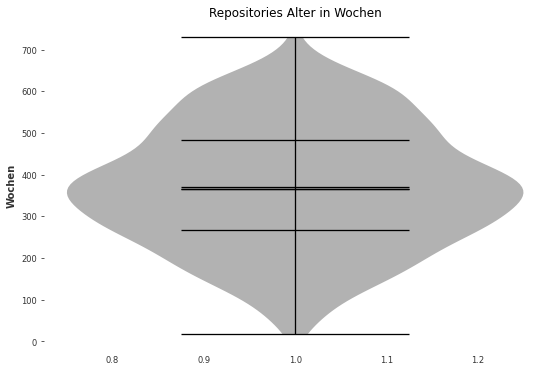

In [13]:
# violinplot of repositories age
plt.figure(figsize=(9, 6), facecolor="w")
his_plot = plt.violinplot(
    df_gen_data["age_in_weeks"],
    showmeans=True,
    showextrema=True,
    showmedians=True,
    quantiles=[0.25, 0.50, 0.75],
)
plt.ylabel("Wochen")
plt.title("Repositories Alter in Wochen")
plt.grid(False)
plt.show()


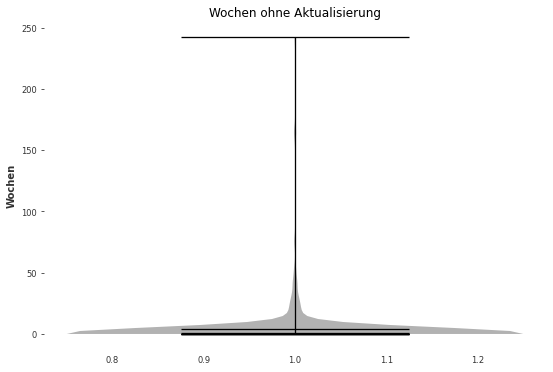

In [14]:
# violinplot of repositoires without update period

plt.figure(
    figsize=(9, 6),
)
his_plot = plt.violinplot(
    df_gen_data["without_updates"],
    showmeans=True,
    showextrema=True,
    showmedians=True,
    quantiles=[0.25, 0.50, 0.75],
)
plt.ylabel("Wochen")
plt.title("Wochen ohne Aktualisierung")
plt.grid(False)
plt.show()


## Sample repositories for Data Analyses

In [15]:
sample_repo_dir = Path(project_dir / "dataset/samples")
sample_repo_dir

PosixPath('/content/drive/MyDrive/masterarbeit/pradt/dataset/samples')

dictionary containing the name of the repository as a key and the file path as a value. There are 6 timeseries as a sample.

In [16]:
# dictionary containing the name of the repository as a key and the file path
# as a value
sampls_repos_dict = {ts.stem: ts for ts in sample_repo_dir.glob("*.csv")}
sampls_repos_dict


{'angular_all_feature_Typescript_repos': PosixPath('/content/drive/MyDrive/masterarbeit/pradt/dataset/samples/angular_all_feature_Typescript_repos.csv'),
 'atom_all_feature_Javascript_repo': PosixPath('/content/drive/MyDrive/masterarbeit/pradt/dataset/samples/atom_all_feature_Javascript_repo.csv'),
 'django_all_feature_Python_repos': PosixPath('/content/drive/MyDrive/masterarbeit/pradt/dataset/samples/django_all_feature_Python_repos.csv'),
 'elasticsearch_all_feature_Java_repos': PosixPath('/content/drive/MyDrive/masterarbeit/pradt/dataset/samples/elasticsearch_all_feature_Java_repos.csv'),
 'mono_all_feature_CSharp_repos': PosixPath('/content/drive/MyDrive/masterarbeit/pradt/dataset/samples/mono_all_feature_CSharp_repos.csv'),
 'pytorch_all_feature_Cpp_repos': PosixPath('/content/drive/MyDrive/masterarbeit/pradt/dataset/samples/pytorch_all_feature_Cpp_repos.csv')}

## Visualization of the  time series 

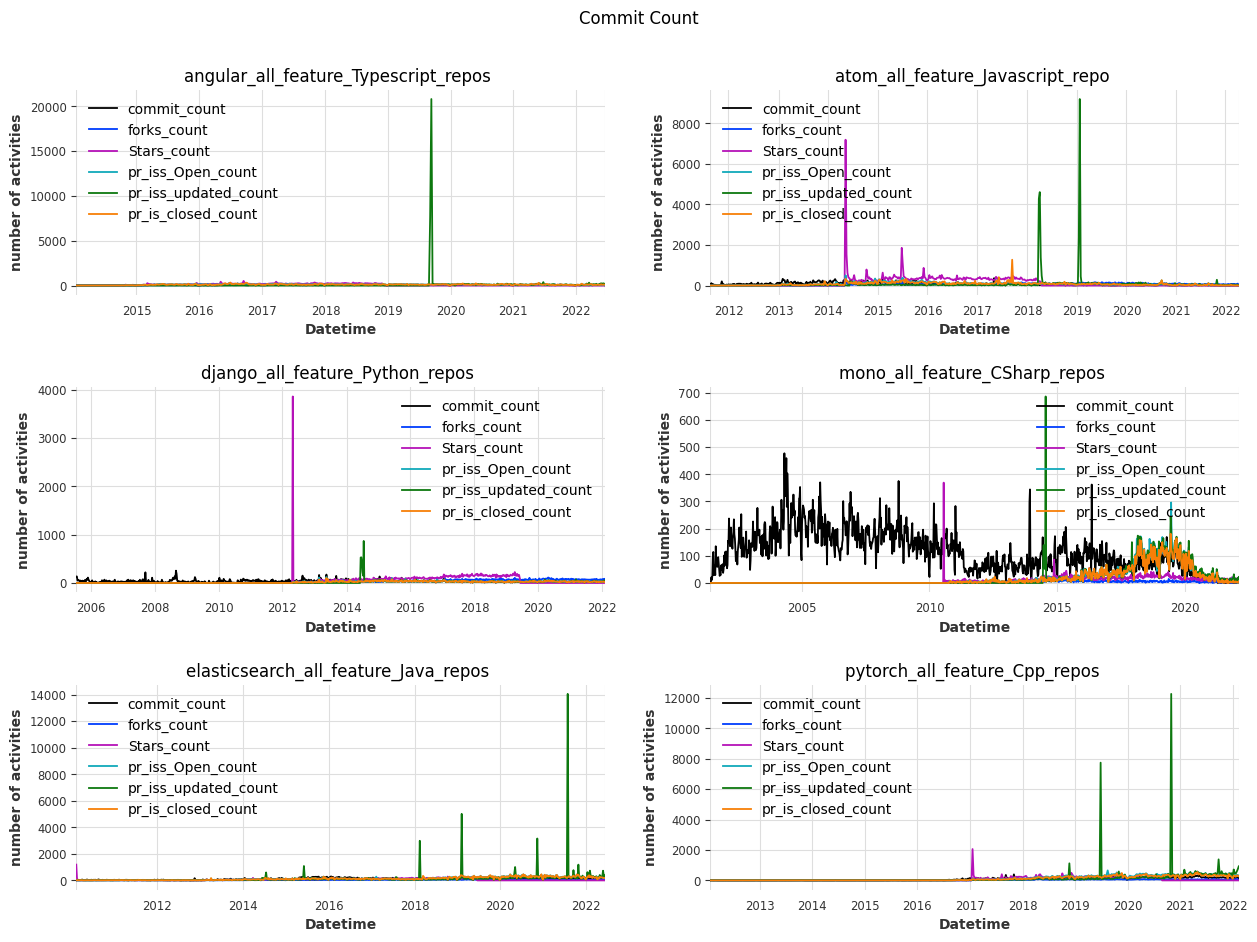

In [17]:
# Original data visualization

figure, ax = plt.subplots(3, 2, figsize=(15, 10), dpi=100)
plt.subplots_adjust(
    left=0.125,
    bottom=0.1,
    right=0.9,
    top=0.9,
    wspace=0.2,
    hspace=0.45,
)
ax = ax.ravel()
figure.suptitle("Commit Count")
repo_names = list(sampls_repos_dict.keys())

for idx, repo in enumerate(sampls_repos_dict.items()):
    repo_df = pd.read_csv(repo[1], index_col="date", parse_dates=["date"])
    repo_df.plot(ax=ax[idx])
    ax[idx].set_title(f"{repo_names[idx]} ")
    ax[idx].set_xlabel("Datetime")
    ax[idx].set_ylabel("number of activities")
    ax[idx].legend()


## ## Check the correlation

In [18]:
# Check the correlation between the commit count and the other Features


def check_corr(repos: Dict[str, Path]) -> None:
    for rname, rpath in repos.items():
        df = pd.read_csv(rpath, index_col="date", parse_dates=["date"])
        df_corr = df.corr(method="pearson")
        print(df_corr.shape)
        print(f"{rname}: correlation with commit_count:")
        df_corrP = pd.DataFrame(df_corr["commit_count"].sort_values(ascending=False))
        print(df_corrP)


In [19]:
check_corr(sampls_repos_dict)

(6, 6)
angular_all_feature_Typescript_repos: correlation with commit_count:
                      commit_count
commit_count              1.000000
pr_is_closed_count        0.687690
pr_iss_Open_count         0.647003
forks_count               0.507038
pr_iss_updated_count      0.067129
Stars_count               0.050553
(6, 6)
atom_all_feature_Javascript_repo: correlation with commit_count:
                      commit_count
commit_count              1.000000
pr_iss_Open_count         0.405242
pr_is_closed_count        0.284059
Stars_count               0.215819
pr_iss_updated_count     -0.065059
forks_count              -0.344940
(6, 6)
django_all_feature_Python_repos: correlation with commit_count:
                      commit_count
commit_count              1.000000
pr_is_closed_count        0.225049
pr_iss_Open_count         0.219660
Stars_count               0.033920
pr_iss_updated_count      0.022203
forks_count              -0.125550
(6, 6)
mono_all_feature_CSharp_repos: correlat

## heatmap

In [36]:
def plot_corr(repos:Dict[str,Path])-> None:
    # figure, ax = plt.subplots(3, 2, figsize=(15, 10), dpi=100)
    # plt.subplots_adjust(
    #     left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.45,
    #     )
    # ax = ax.ravel()
    # figure.suptitle(' Korrelationsmatrix')
    # repo_names= list(repos.keys())
    for rname ,rpath in repos.items():
    #for idx, repos in enumerate(repos):
        plt.figure(figsize = (8,5))
        sns.set(font_scale=1)
        df_corr = pd.read_csv(repos[rname], index_col='date' , parse_dates=['date'])
        ax = sns.heatmap(df_corr.corr().round(3), 
            annot=True, 
            square=True, 
            linewidths=.75, cmap="coolwarm", 
            fmt = ".2f", 
            annot_kws = {"size": 14})
        ax.xaxis.tick_bottom()
        ax.set_title(f"{rname} ");
        plt.show()


# plt.figure(figsize = (9,6))
# sns.set(font_scale=0.75)
# ax = sns.heatmap(multi_df.corr().round(3), 
#             annot=True, 
#             square=True, 
#             linewidths=.75, cmap="coolwarm", 
#             fmt = ".2f", 
#             annot_kws = {"size": 11})
# ax.xaxis.tick_bottom()
# plt.title("correlation matrix")
# plt.show()

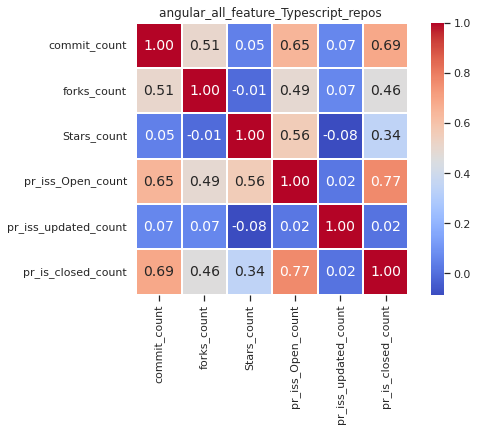

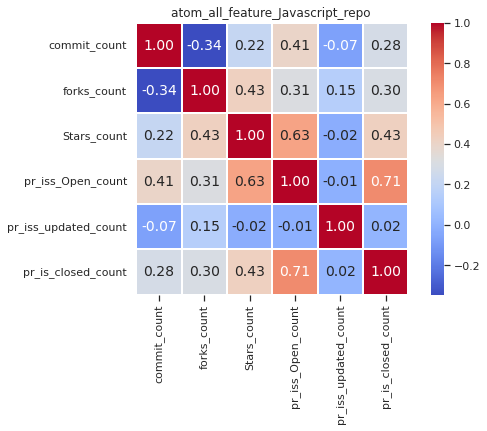

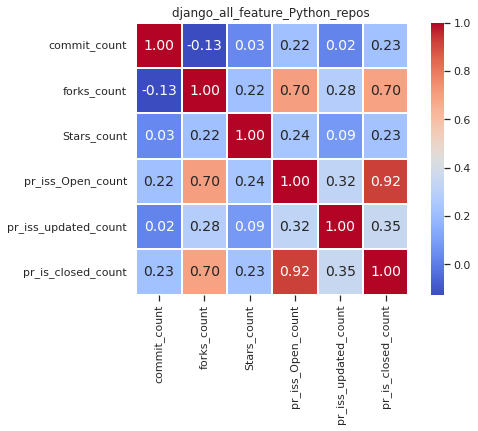

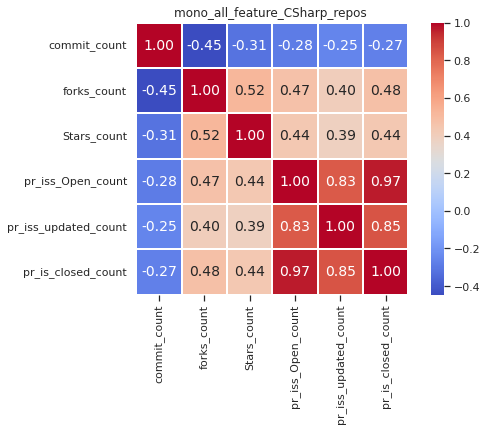

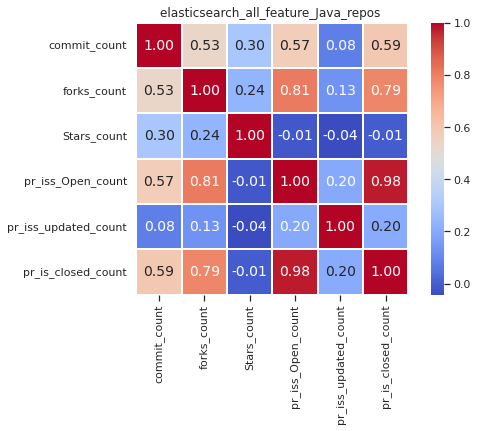

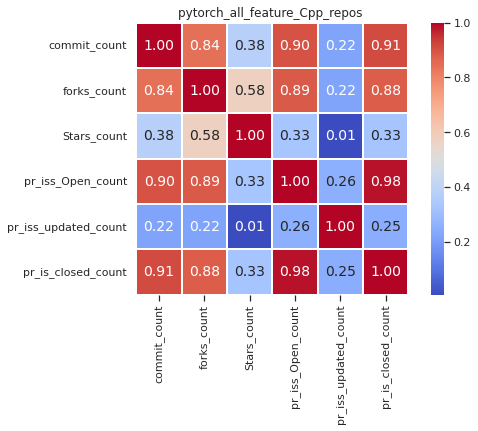

In [37]:
plot_corr(sampls_repos_dict)

## Convert to Timeseries Darts object
First the data will be converted into Darts Library Timeserie object. Bacause darts provides also as Timeseries analysis methods 

In [38]:
def create_ts_sample(
    repos_seqs: Union[List[str], Dict[str, Path]]
) -> Tuple[List[TimeSeries], List[TimeSeries]]:
    print("creating  sequences of TimeSeries from csv files...")

    # target timeseries sequences
    # pass covariate sequences
    target_ts_sqs, pass_covar_sqes = [], []
    for r_name, r_path in repos_seqs.items():
        target_series = TimeSeries.from_csv(
            r_path, time_col="date", value_cols="commit_count"
        )
        pass_covar = TimeSeries.from_csv(
            r_path,
            time_col="date",
            value_cols=[
                "forks_count",
                "Stars_count",
                "pr_iss_Open_count",
                "pr_iss_updated_count",
                "pr_is_closed_count",
            ],
        )

        target_ts_sqs.append(target_series.astype(np.float32))
        pass_covar_sqes.append(pass_covar.astype(np.float32))
    print(
        "Created. There are {} series, with average training length {}".format(
            len(target_ts_sqs), np.mean([len(s) for s in target_ts_sqs])
        )
    )
    return target_ts_sqs, pass_covar_sqes

In [39]:
# sample target series (commits), sample past covariates series
samp_tar_ser, samp_pacovs_ser = create_ts_sample(sampls_repos_dict)

creating  sequences of TimeSeries from csv files...
Created. There are 6 series, with average training length 684.8333333333334


In [40]:
# Float32 is recommended for better optimization
samp_tar_ser[0].dtype

dtype('float32')

## Check seasonality

In [42]:
def check_seasonal(t_series: TimeSeries) -> None:
    for idx, repo_series in enumerate(t_series):
        is_seasonal, mseas = check_seasonality(repo_series, m=12, alpha=0.05)
        if is_seasonal:
            print(f"seasonal? {is_seasonal}")
            print(f"There is seasonality of order {mseas} months for {idx}")
        else:
            print(f"seasonal?  False")
            print(f"There is no seasonality of order {mseas} months for {idx}")

In [43]:
check_seasonal(samp_tar_ser )

seasonal? True
There is seasonality of order 12 months for 0
seasonal?  False
There is no seasonality of order 12 months for 1
seasonal?  False
There is no seasonality of order 12 months for 2
seasonal? True
There is seasonality of order 12 months for 3
seasonal?  False
There is no seasonality of order 12 months for 4
seasonal? True
There is seasonality of order 12 months for 5


In [44]:
def plot_seasonality(t_series: TimeSeries)-> None:
    figure, ax = plt.subplots(3, 2, figsize=(15, 10), dpi=100)
    plt.subplots_adjust(
        left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.45,
        )
    ax = ax.ravel()
    figure.suptitle(' Autorkorrelation')
    repo_names= list(sampls_repos_dict.keys())
    for idx, repo_series in enumerate(t_series):
        plot_acf(repo_series, m=12, alpha=0.05, axis= ax[idx])
        ax[idx].set_title(f"{repo_names[idx]} ");
        #ax[idx].set_xlabel("Datetime")
        #ax[idx].set_ylabel("number of activities")
        ax[idx].legend()

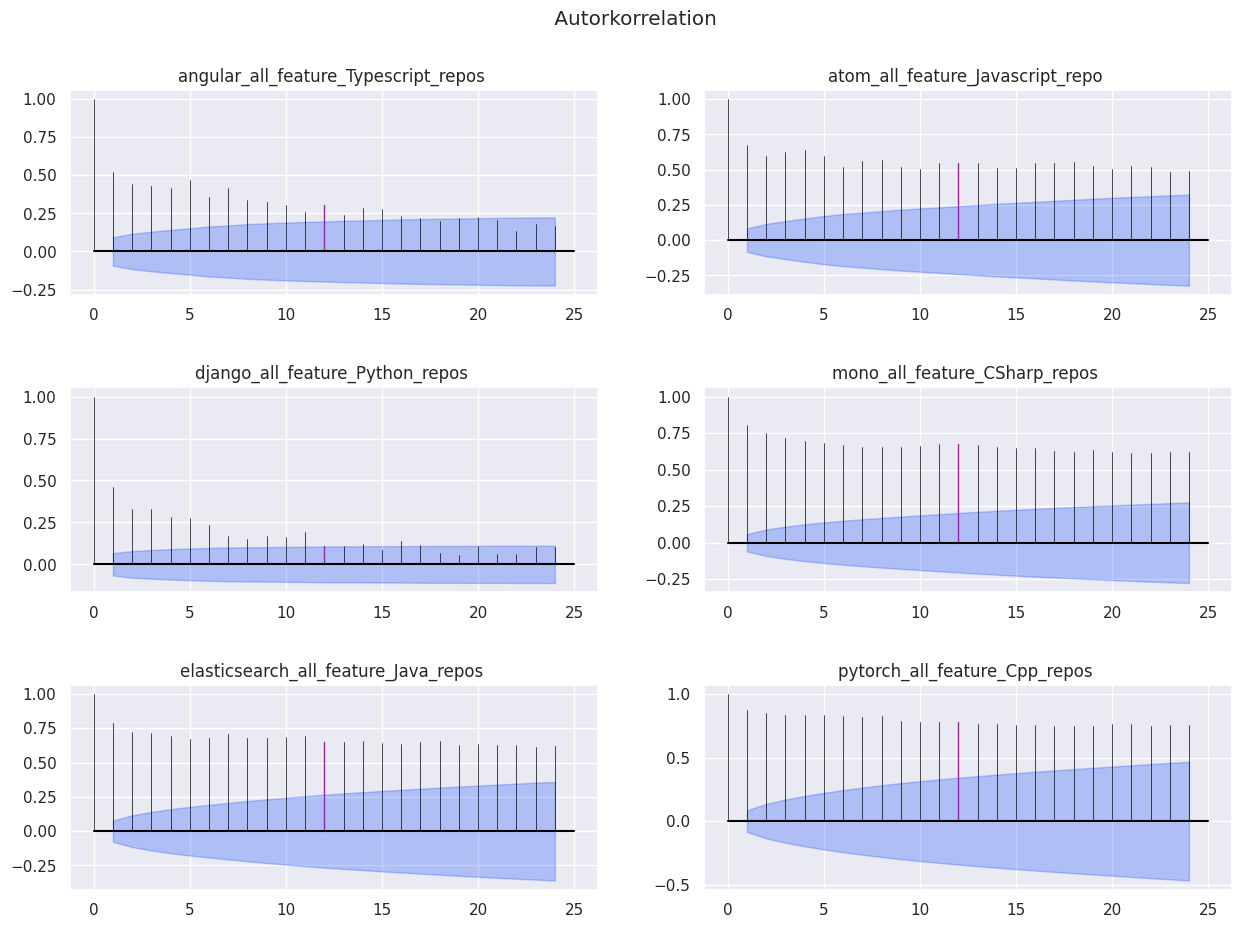

In [45]:
plot_seasonality(samp_tar_ser)

## ETS analysis: try to discern trend and seasonal components
ETS approach (error — trend — seasonality) to isolate the trend and the seasonal component. Darts wraps the ETS method of the statsmodels package.

In [46]:
# ETS analysis: try to discern trend and seasonal components
ts_trend, ts_seas = extract_trend_and_seasonality(ts=samp_tar_ser[1], freq=7)

plt.figure(100, figsize=(18, 5))
ts_trend.plot()
plt.title("trend component");

plt.figure(100, figsize=(18, 5))
ts_seas.plot()
plt.title("seasonal component");

ValueError: ignored

# Example of the target series plot i.e commit count

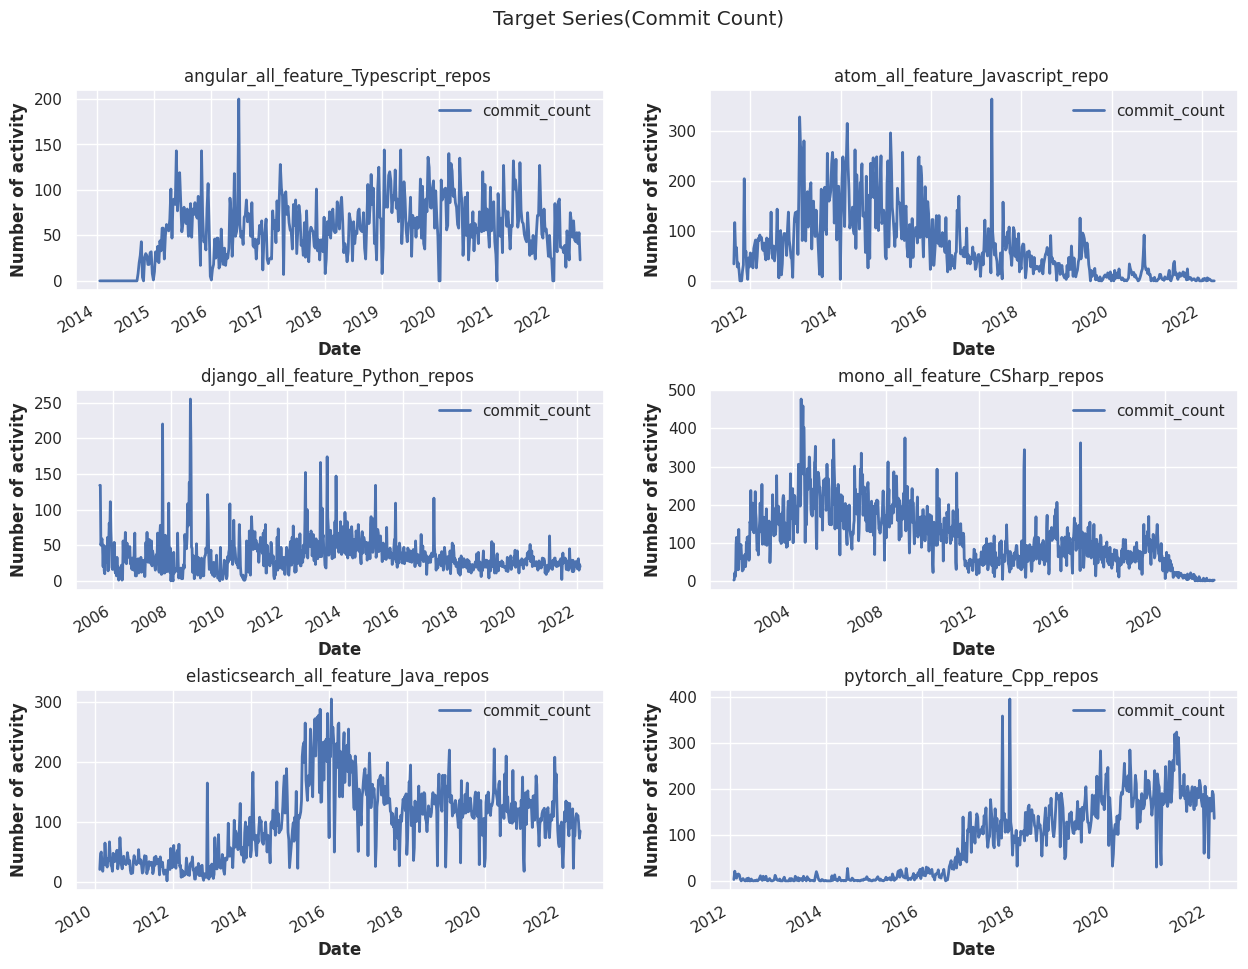

In [48]:
figure, ax = plt.subplots(3, 2, figsize=(15, 10), dpi=100,  )
plt.subplots_adjust(
        left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.50,
        )
ax = ax.ravel()
plt.legend(loc='upper left', title='Features')
figure.suptitle('Target Series(Commit Count)')

repo_names= list(sampls_repos_dict.keys())

for idx, repo in enumerate(samp_tar_ser):
    repo.plot( ax=ax[idx])
    ax[idx].set_title(f"{repo_names[idx]} ");
    ax[idx].set_xlabel("Date")
    ax[idx].set_ylabel("Number of activity")
    ax[idx].legend(repo.components)

## past covariates 

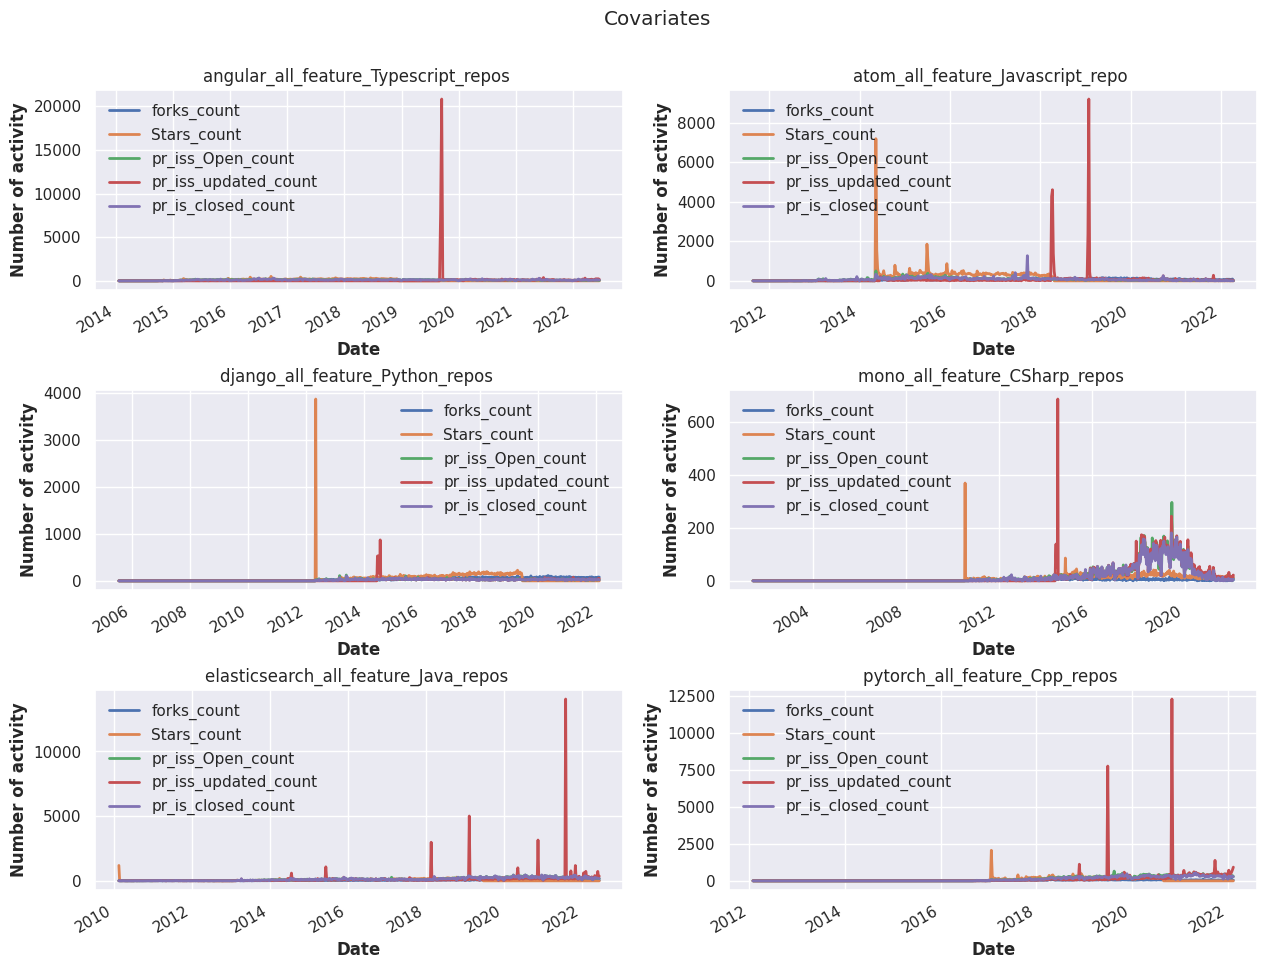

In [49]:
figure, ax = plt.subplots(3, 2, figsize=(15, 10), dpi=100, )
plt.subplots_adjust(
        left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.50,
        )
ax = ax.ravel()
plt.legend(loc='upper left', title='Features')
repo_names= list(sampls_repos_dict.keys())
figure.suptitle('Covariates')
for idx, repo in enumerate(samp_pacovs_ser):
    repo.plot( ax=ax[idx])
    ax[idx].set_title(f"{repo_names[idx]} ");
    ax[idx].set_xlabel("Date")
    ax[idx].set_ylabel("Number of activity")
    ax[idx].legend(repo.components)

## TimeSeries components

In [51]:
def ts_components(ts: TimeSeries) -> None:
    print("components:", ts[0].components)
    print("duration:", ts[0].duration)
    print("frequency:", ts[0].freq)
    print("frequency:", ts[0].freq_str)
    print(
        "has date time index? (or else, it must have an integer index):",
        ts[0].has_datetime_index,
    )
    print("deterministic:", ts[0].is_deterministic)
    print("univariate:", ts[0].is_univariate)


In [52]:
# Timeseries component of the Target sereis (commit)
ts_components(samp_tar_ser[0])

components: Index(['commit_count'], dtype='object', name='component')
duration: 0 days 00:00:00
frequency: <Week: weekday=6>
frequency: W-SUN
has date time index? (or else, it must have an integer index): True
deterministic: True
univariate: True


In [53]:
# Timeseries component of the past covariates sereis
ts_components(samp_pacovs_ser[0])

components: Index(['forks_count', 'Stars_count', 'pr_iss_Open_count',
       'pr_iss_updated_count', 'pr_is_closed_count'],
      dtype='object', name='component')
duration: 0 days 00:00:00
frequency: <Week: weekday=6>
frequency: W-SUN
has date time index? (or else, it must have an integer index): True
deterministic: True
univariate: False
